In [1]:
# Antonio, Liz, Jacqueline
# Import all the libraries necessary to perform necessary operations
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import datetime
import glob
import math
import numpy as np
from numpy import *
import numpy.polynomial.polynomial as poly
from scipy.interpolate import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore") 

## Background
In this section, we extract the wine review data from the folder and exclude every entry without valid values for the relevant categories of data.
In total we have 96k remember

In [2]:
# Antonio
files = glob.glob('./Data/Wine_Reviews//*.csv')
data = [pd.read_csv(file) for file in files]

dataframe = pd.concat(data, ignore_index=True).dropna(subset=['points','price','country','taster_name','variety'])
display(dataframe)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


## Define function to rank subgroups
Here we define a function that sorts categories (i.e. wine variety, taster name, country of origin) based on the number of wine reviews in the respective category. This is used in cases where there are too many categories and we want to identify the most popular subgroups in the category for data analysis

In [3]:
# Antonio, Liz
def sort_by_popularity (categories, number):
    """
    This function returns a dictionary with keys as categories and values items in that category 
    organzied in descending order by number of reviews 
    
    Inputs:
    categories = list with names of categories as strings
    number = integer specifying the number of top items in a category
    
    Output:
    rankings_dict = dictionary with items in a category organized in descending order by number of reviews
    
    """
    popularities_across_categories = pd.DataFrame()

    rankings_dict = {}
    
    # Cycle through qualitative categories
    for category in categories:
        # Sort wine varieties by number of reviews
        popularity = pd.DataFrame(columns=[category,'Number of Reviews'])

        subgroups = set(dataframe[category])

        #### Identify the subcategories with the most reviews because we can't plot it all ####
        for index, subgroup in zip(range(len(subgroups)),subgroups):

            review_number = len(dataframe.loc[dataframe[category] == subgroup])

            popularity.loc[index] = [subgroup, review_number]

        popularity = popularity.sort_values('Number of Reviews', ascending=False)

        most_popular_subgroups_df = popularity.head(number)

        rankings_dict[category] = most_popular_subgroups_df

    return rankings_dict


## Inspecting meritocracy across different subgroups
before doing more detailed analysis, we first (without normalizing for anything) just plot the wine review score vs the wine price across the different subgroups in the categories we identify. Here, we look at what the linear relationship is between score and price for reviews by each taster, each variety of wine and each country of origin for the 6 most popular subgroups in each category

In [4]:
# Antonio
# Dictionary for sorting the top 6 subgroups in each category using the above function
categories = ['variety','country','taster_name']

rankings_dict = sort_by_popularity(categories, 6)
display(rankings_dict)

{'variety':                       variety Number of Reviews
 249                Pinot Noir              9833
 255                Chardonnay              8292
 457                 Red Blend              6842
 541        Cabernet Sauvignon              6198
 94   Bordeaux-style Red Blend              4816
 185                  Riesling              4722,
 'country':      country Number of Reviews
 29        US             37511
 10    France             17525
 1      Italy             10121
 33     Spain              6509
 20  Portugal              4870
 23     Chile              4305,
 'taster_name':           taster_name Number of Reviews
 5          Roger Voss             20172
 17  Michael Schachner             14944
 1       Kerin O’Keefe              9874
 7      Virginie Boone              9507
 10       Paul Gregutt              9497
 0       Matt Kettmann              6237}

Pinot Noir R^2 : 0.3807260050389479
Chardonnay R^2 : 0.4384976014958624
Red Blend R^2 : 0.43373943337426135
Cabernet Sauvignon R^2 : 0.5514616695062627
Bordeaux-style Red Blend R^2 : 0.33383298193499655
Riesling R^2 : 0.3982583473861585


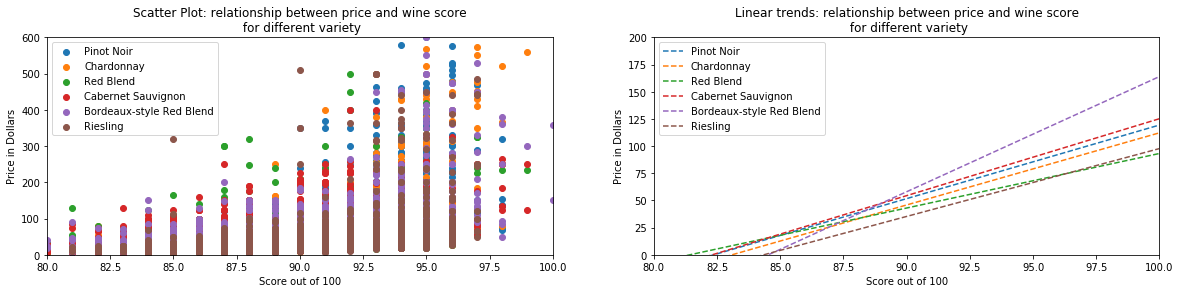

US R^2 : 0.4380743717295661
France R^2 : 0.40602242748948164
Italy R^2 : 0.4573078397076786
Spain R^2 : 0.47066365730151216
Portugal R^2 : 0.4401284513417935
Chile R^2 : 0.47915618103389523


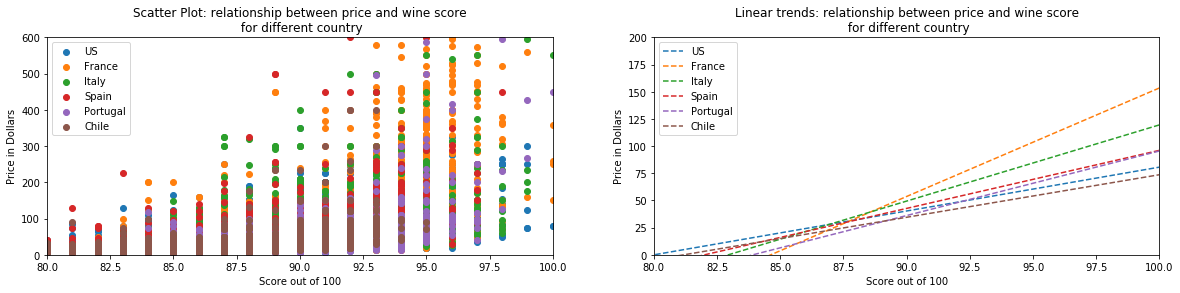

Roger Voss R^2 : 0.4123751812972143
Michael Schachner R^2 : 0.4904666441882222
Kerin O’Keefe R^2 : 0.4550894886246015
Virginie Boone R^2 : 0.4440089112997339
Paul Gregutt R^2 : 0.4946562793298246
Matt Kettmann R^2 : 0.292785303428027


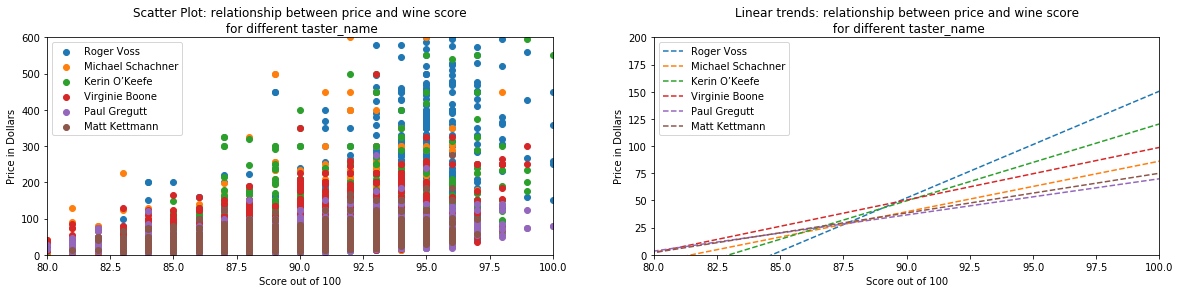

In [5]:
# Antonio

categories = ['variety','country','taster_name']

rankings_dict = sort_by_popularity(categories, 6)

# Cycle through qualitative categories 
for category in categories:

    most_popular_subgroups = rankings_dict[category][category].values

    #### Plots for each subcategory ####
    
    # plotting the data for each subcategory in two different ways: scatter plots and linear trends
    points = plt.subplot(1,2, 1)
    linear_trends = plt.subplot(1,2, 2)

    # for each category, sort through each subgroup to filter for its reviews
    for subgroup in most_popular_subgroups:

        # Filter for reviews by that subgroup and store the price and points as y and x respectively
        relevant_wine_data = dataframe.loc[dataframe[category] == subgroup]
        y = relevant_wine_data['price']
        x = relevant_wine_data['points']
        
        # Print R Squared values
        R_squared = np.corrcoef(x,y)[1][0]
        print(str(subgroup) + ' R^2 : ' + str(R_squared))

        # scatter plot
        points.scatter(x,y)

        # linear best fit
        axis_range = linspace(0,500) # This is the x-axis data used to model the trend lines
        linear_coefs = polyfit(np.float32(x), np.float32(y), deg=1) # This is the coefficients for the linear best fit
        linear_trends.plot(axis_range, polyval(linear_coefs,axis_range),'--') # plot the linear trend lines
        
    # labeling and formatting the graphs
    for graph, name in zip([points, linear_trends],['Scatter Plot', 'Linear trends']):
        
        graph.set_title(name+': relationship between price and wine score\n for different ' + category)
        graph.set_ylabel('Price in Dollars')
        graph.set_xlabel('Score out of 100')
        graph.legend(most_popular_subgroups)
        graph.set_xlim([80,100]) # this is included because the lowest score given is actually 80, so we zoom in on this range
    
    # graph specific formatting
    points.set_ylim([0,600])
    linear_trends.set_ylim([0,200])
    
    plt.subplots_adjust(right=2.7)
    plt.show()

## Scatter plots summarizing reviews by subgroup
there are two sets of scatter plots plotted here. Each plot in the first set shows all the wine reviews for each wine taster. Each plot in the second set shows every wine review for wine from a certain source country. The reviews are color coded based on the variety of wine used.

The following scatter plots show the distribution of wine prices and scores, sorted by country


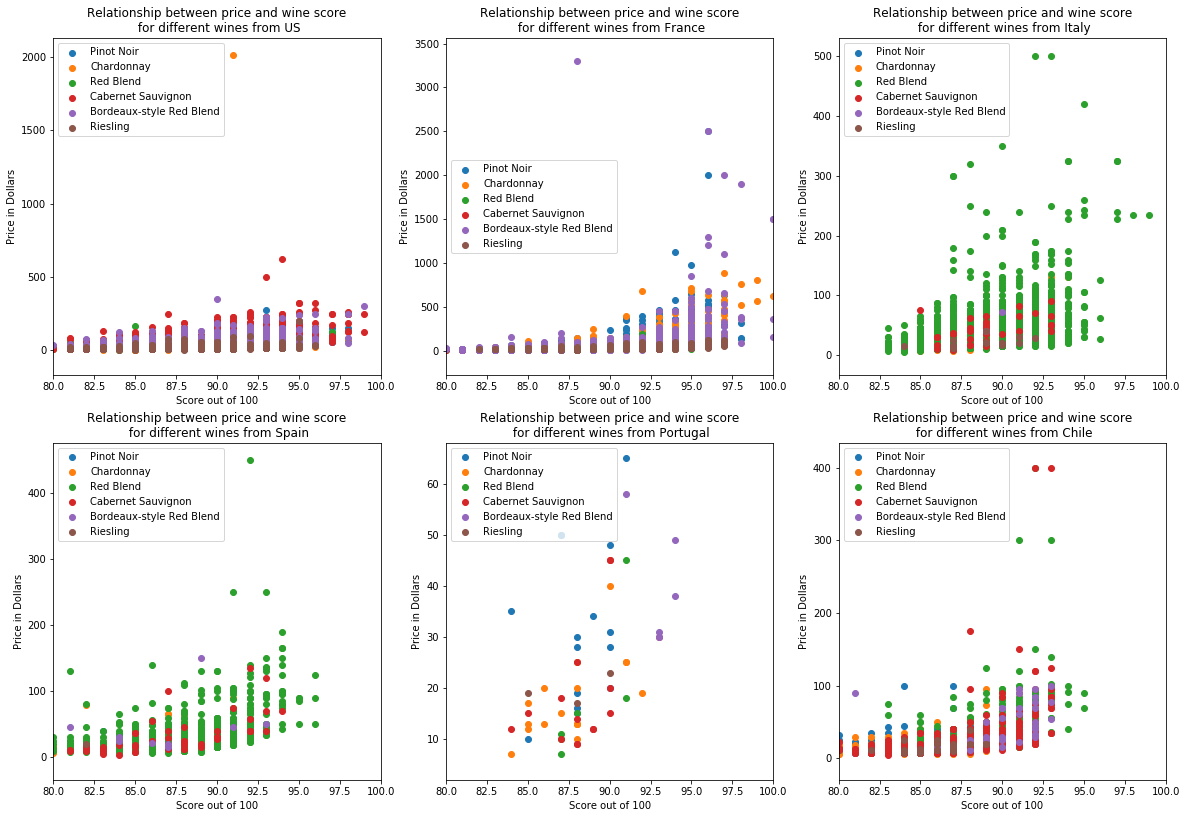

The following scatter plots show the distribution of wine prices and scores, sorted by taster_name


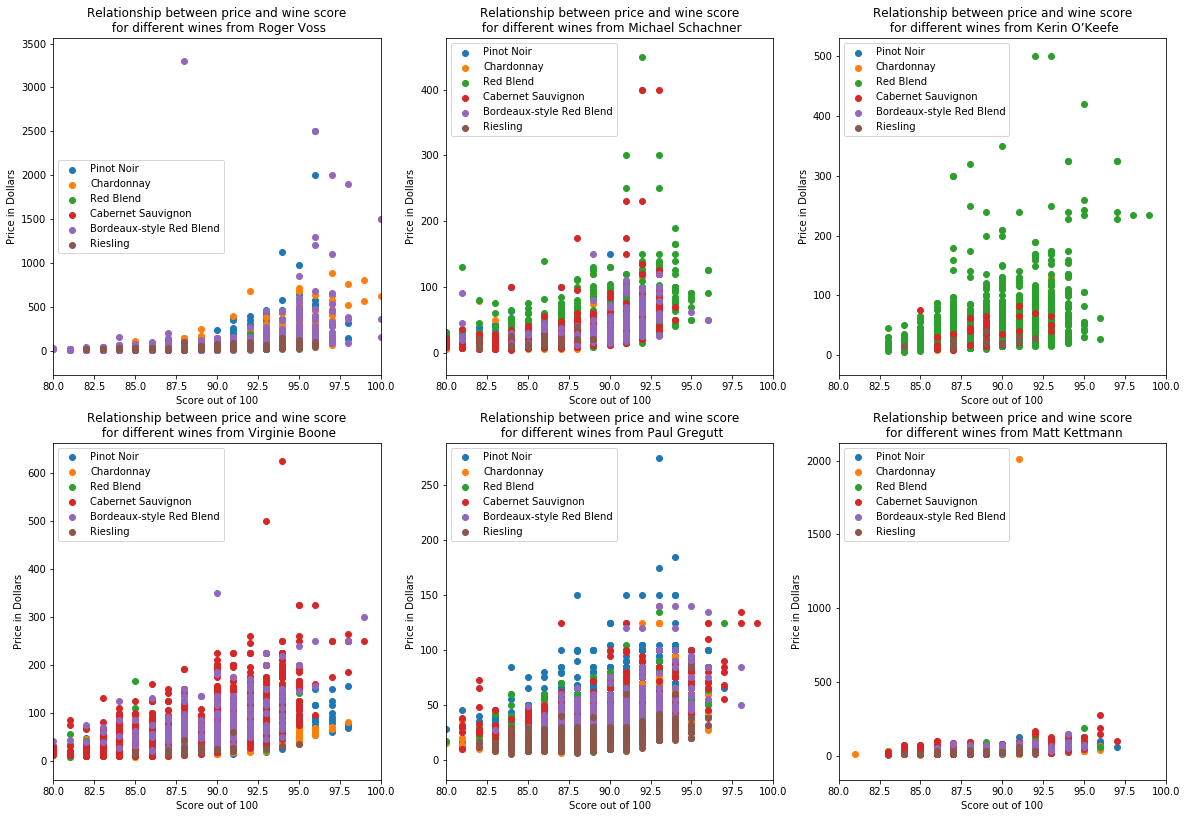

In [6]:
# Antonio
# These categories are the two sets of scatter plots we will produce
categories_for_scatter = ['country','taster_name']

# we want a list of every wine variety to plot the points in a unique colour for each varieyt
most_popular_wines = rankings_dict['variety']['variety'].values

# Cycle through 
for key in categories_for_scatter:
    # List of most popular subgroups in each category
    most_popular_in_category = rankings_dict[key][key].values
    print('The following scatter plots show the distribution of wine prices and scores, sorted by ' + key)

    # loop through subgroups
    for subgroup, index in zip(most_popular_in_category, range(len(most_popular_in_category))):
        
        # Filter data by subgroup
        subgroup_data = dataframe.loc[dataframe[key] == subgroup]
        
        # Make subplots and plot them on two rows for visibility
        scatter_plot = plt.subplot(2,math.ceil(len(most_popular_in_category)/2), index+1)

        # after filtering the data like so, plot every wine review, color coded by wine variety
        for wine in most_popular_wines:
            # filter data for the variety of wine
            wine_data = subgroup_data.loc[subgroup_data['variety'] == wine]
            
            X =  wine_data['points']
            Y =  wine_data['price']
            scatter_plot.scatter(X,Y)
        
        # formatting the subplots
        scatter_plot.set_title('Relationship between price and wine score\n for different wines from ' + subgroup)
        scatter_plot.set_ylabel('Price in Dollars')
        scatter_plot.set_xlabel('Score out of 100')
        scatter_plot.legend(most_popular_wines)
        scatter_plot.set_xlim([80,100])

    plt.subplots_adjust(right=2.7, top=2.7)
    plt.show()


## Looking at specific categories

In [7]:
# Liz, Jacqueline
def sort_by_numb_of_reviews (column_1_name, category):
    """    
    This function returns a numpy array with the top 10 most reviewed items in a category
    
    Inputs: 
        column_1_name = string with name of column of category
        category = string with name of category in the dataset
    
    Output:
        relevant_wine_data = panda dataframe with column info in desending order by number of instances
        
    """
    
    # get relevant column data
    wine_popularity = pd.DataFrame(columns=[column_1_name,'Number of Reviews'])
    
    for index, wine_type in zip(range(len(set(dataframe[category]))),set(dataframe[category])):
        review_number = len(dataframe.loc[dataframe[category] == wine_type])
    
        wine_popularity.loc[index] = [wine_type, review_number]

    # sort the data    
    wine_popularity = wine_popularity.sort_values('Number of Reviews', ascending=False)

    most_popular_category_df = wine_popularity.head(10)
    display(most_popular_category_df)

    most_popular_categories = most_popular_category_df[column_1_name].values

    relevant_wine_data = dataframe.loc[dataframe[category].isin(most_popular_categories)]
    
    return most_popular_categories

In [8]:
most_popular_countries = sort_by_numb_of_reviews('Country','country')
most_popular_tasters = sort_by_numb_of_reviews('Reviewer','taster_name')
most_popular_types = sort_by_numb_of_reviews('Type','variety')

,Country,Number of Reviews
29,US,37511
10,France,17525
1,Italy,10121
33,Spain,6509
20,Portugal,4870
23,Chile,4305
18,Argentina,3753
15,Austria,2791
12,Germany,2093
9,Australia,2007


,Reviewer,Number of Reviews
5,Roger Voss,20172
17,Michael Schachner,14944
1,Kerin O’Keefe,9874
7,Virginie Boone,9507
10,Paul Gregutt,9497
0,Matt Kettmann,6237
6,Joe Czerwinski,5010
14,Sean P. Sullivan,4925
11,Anna Lee C. Iijima,4369
15,Jim Gordon,4171


,Type,Number of Reviews
249,Pinot Noir,9833
255,Chardonnay,8292
457,Red Blend,6842
541,Cabernet Sauvignon,6198
94,Bordeaux-style Red Blend,4816
185,Riesling,4722
400,Sauvignon Blanc,3838
253,Syrah,3103
112,Rosé,3032
496,Malbec,2524


In [9]:
# Liz, Jacqueline
def sort_category_by_taster(most_popular_tasters, most_popular_category, dataframe_dot_category):
    """ 
    This function returns a dictionary with scores for wines sorted by items in a category 
    
    Inputs: 
    most_popular_tasters = pandas.core.frame.DataFrame with top tasters
    most_popular_category = pandas.core.frame.DataFrame with items in a category
    dataframe_dot_category = dataframe specification for category
    
    Output:
    category_data_by_taster_dict = dictionary with taster names as keys and lists of data for each item as values
    
    """
    
    category_data_by_taster_dict = {}
    relevant_wine_data = dataframe.loc[dataframe['taster_name'].isin(most_popular_tasters)]

    # initialize a list for each item in the category
    for taster in most_popular_tasters:
        category_data_by_taster_dict[taster] = [[] for i in range(len(most_popular_category))]
        count = 0
    
        # loop through and add wine score data relevant for each item 
        for item in most_popular_category:
            category_wine_data = relevant_wine_data[(dataframe.taster_name == taster) & \
                  (dataframe_dot_category == item)]
            
            for wine in range(len(category_wine_data['points'])):
                category_data_by_taster_dict[taster][count] = category_wine_data['points']
            count += 1
    
    return category_data_by_taster_dict

In [10]:
country_data_by_taster_dict = sort_category_by_taster(most_popular_tasters, most_popular_countries, dataframe.country)
type_data_by_taster_dict = sort_category_by_taster(most_popular_tasters, most_popular_types, dataframe.variety)

## Define Functions to sort and plot data for each taster based on country of origin and variety

In [11]:
# Liz, Jacqueline
def stats_for_category_by_taster(category_data_by_taster_dict, most_popular_category):
    """"
    This function returns lists of means, standard deviations for each item in a category
    
    Inputs:
    category_data_by_taster_dict = dictionary with taster names as keys and lists of data for each item as values
    most_popular_category = pandas.core.frame.DataFrame with items in a category
    
    Output:
    stats_for_category_by_taster_dict = dictionary with taster names as keys and lists of means, stds as values
    
    """
    
    stats_for_category_by_taster_dict = {}
    
    for taster in category_data_by_taster_dict.keys():
        stats_for_category_by_taster_dict[taster] = [[] for i in range(len(most_popular_category))]
        count = 0

        for item in range(len(category_data_by_taster_dict.get(taster))):
            mean = np.mean(category_data_by_taster_dict.get(taster)[item])
            std = np.std(category_data_by_taster_dict.get(taster)[item])
            stats_for_category_by_taster_dict[taster][count] = [mean, std]
            count += 1   
    
    return stats_for_category_by_taster_dict

## Call the function to produce the data

In [12]:
stats_for_country_by_taster_dict = stats_for_category_by_taster(country_data_by_taster_dict, most_popular_countries)
stats_for_type_by_taster_dict = stats_for_category_by_taster (type_data_by_taster_dict, most_popular_types)

In [13]:
# Liz
def plot_data (most_popular_category, stats_for_category_by_taster_dict, category):
    """
    This function plots scores of items in a category for each taster
    
    Inputs:
    most_popular_category = pandas.core.frame.DataFrame with items in a category
    stats_for_category_by_taster_dict = dictionary with taster names as keys and lists of means, stds as values
    category = string with name of category i.e. 'Country'
    
    Output:
    graphs of data for each taster
    
    """

    categories = most_popular_category
    x_pos = np.arange(len(categories))

    for taster in stats_for_category_by_taster_dict.keys():
        AVGs = []
        error = []
        stats = stats_for_category_by_taster_dict.get(taster)

        for item in range(len(stats_for_category_by_taster_dict)):
            AVGs.append(stats[item][0])
            error.append(stats[item][1])

        # Build the plot
        fig, ax = plt.subplots()
        ax.bar(x_pos, AVGs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
        ax.set_ylabel('average score')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(categories)
        plt.xticks(rotation=60)
        ax.set_title(category + ' vs. avg score for ' + taster)
        ax.yaxis.grid(True)
        plt.ylim(80,100)
        plt.yticks(np.arange(80, 101, 2.0))

        # Show the figure
        plt.tight_layout()
        plt.show()


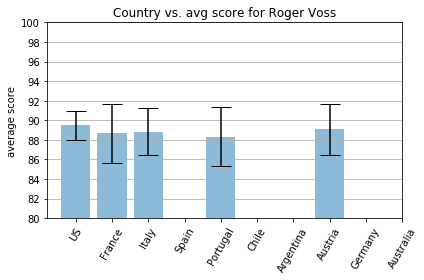

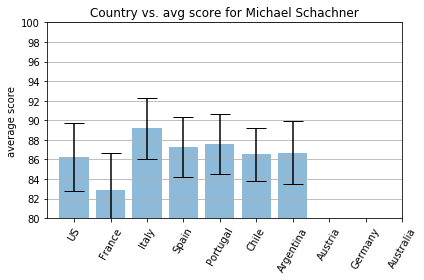

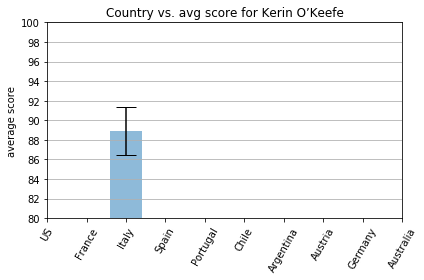

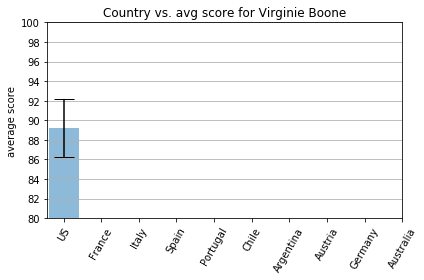

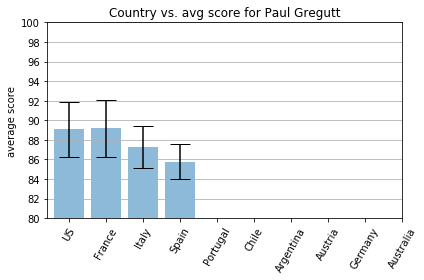

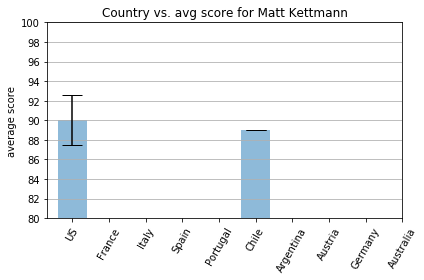

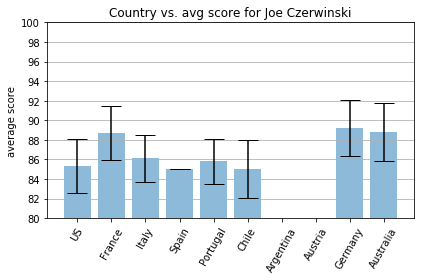

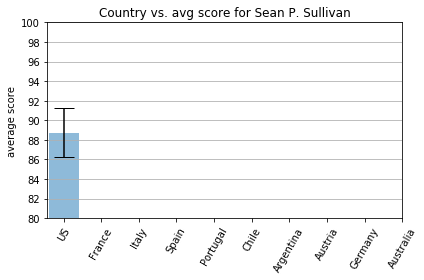

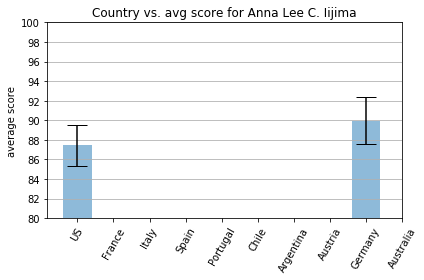

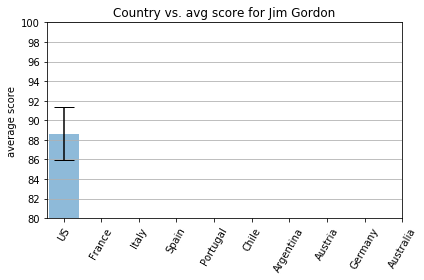

In [14]:
plot_data (most_popular_countries, stats_for_country_by_taster_dict, 'Country')

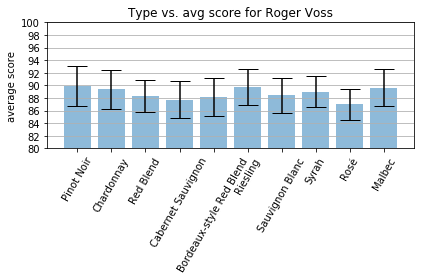

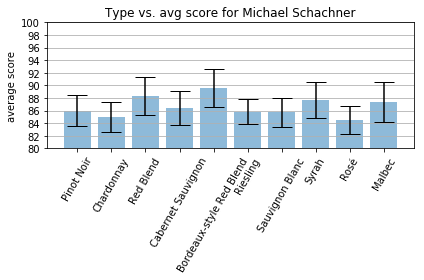

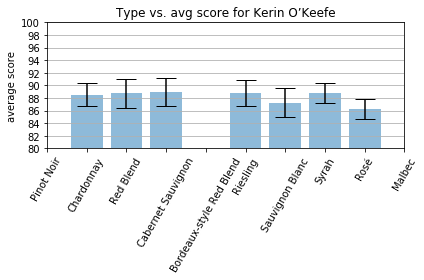

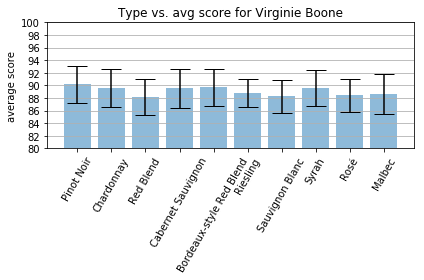

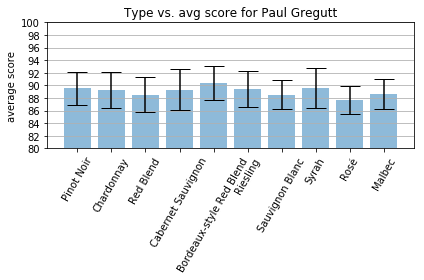

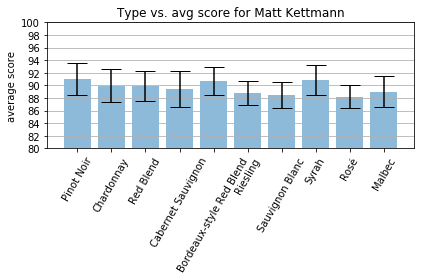

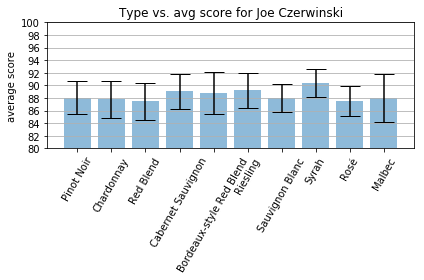

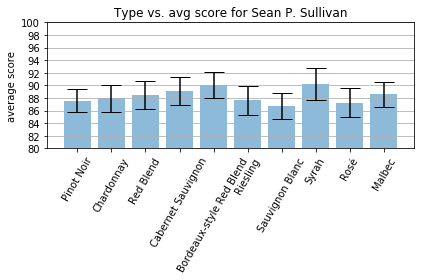

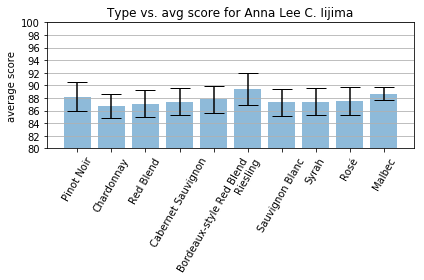

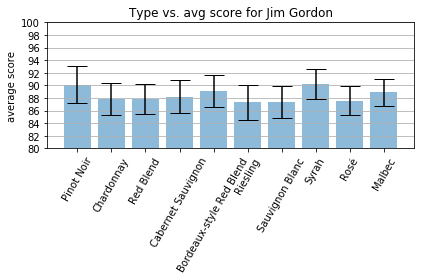

In [15]:
plot_data (most_popular_types, stats_for_type_by_taster_dict, 'Type')

## Anova Test and Welch's T-Test

In [16]:
# mostly Antonio, a little Liz

function_names = ["Anova Test", "Welch's T-Test"]
function_command = [stats.f_oneway , stats.ttest_ind]

tasters = most_popular_tasters

categories = [most_popular_countries,most_popular_types]
category_names = ['countries', 'wine varieties']
category_data_by_taster_dict = [country_data_by_taster_dict, type_data_by_taster_dict]

for category, category_name, category_dict in zip(categories,category_names,category_data_by_taster_dict):
    print('\nThe following test results pertain to differences between ' + category_name)
    for fun,fun_name in zip(function_command,function_names):

        # Define dataframes to put data into
        test_values_across_tasters = pd.DataFrame(columns=category,index = tasters)
        p_values_across_tasters = pd.DataFrame(columns=category,index = tasters)

        # loop through each taster and determine the anova or welch T test values for each country 
        # relative to the combined data for the other countries

        for taster in tasters:
            for subcategory, count in zip(category,range(len(category))):
                # the two populations are the data for that subcategory and the data for all the other subcategories
                test_output, p = fun(np.asarray(category_dict[taster][count]), 
                                                  np.asarray(np.concatenate(
                                                      np.delete(np.asarray(category_dict[taster]),
                                                                np.asarray(category_dict[taster][count])))))
                test_values_across_tasters.loc[taster,subcategory] = test_output
                p_values_across_tasters.loc[taster,subcategory] = p

        print('\nThe ' + fun_name + ' values for the different taster rankings of each country are as follows:')
        display(test_values_across_tasters)
        print('\nThe associated P-Values are as follows:')
        display(p_values_across_tasters)


The following test results pertain to differences between countries

The Anova Test values for the different taster rankings of each country are as follows:


,US,France,Italy,Spain,Portugal,Chile,Argentina,Austria,Germany,Australia
Roger Voss,0.17712,4.00684,0.601482,NaN,34.2661,NaN,NaN,20.0283,NaN,NaN
Michael Schachner,3.35584,36.2035,38.2433,73.968,0.386488,62.6258,15.4871,NaN,NaN,NaN
Kerin O’Keefe,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginie Boone,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paul Gregutt,0.00201585,0.0418495,1.67414,5.55152,NaN,NaN,NaN,NaN,NaN,NaN
Matt Kettmann,1.30109e-05,NaN,NaN,NaN,NaN,0.162244,NaN,NaN,NaN,NaN
Joe Czerwinski,121.759,0.613345,61.0214,1.45766,15.4836,32.5281,NaN,NaN,14.0194,5.35849
Sean P. Sullivan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anna Lee C. Iijima,297.839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.864,NaN
Jim Gordon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The associated P-Values are as follows:


,US,France,Italy,Spain,Portugal,Chile,Argentina,Austria,Germany,Australia
Roger Voss,0.673864,0.0453238,0.438022,NaN,4.86696e-09,NaN,NaN,7.67054e-06,NaN,NaN
Michael Schachner,0.0669871,1.81969e-09,6.40938e-10,8.48155e-18,0.534161,2.63603e-15,8.33752e-05,NaN,NaN,NaN
Kerin O’Keefe,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginie Boone,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paul Gregutt,0.964189,0.837911,0.195737,0.0184852,NaN,NaN,NaN,NaN,NaN,NaN
Matt Kettmann,0.997122,NaN,NaN,NaN,NaN,0.687113,NaN,NaN,NaN,NaN
Joe Czerwinski,6.82763e-28,0.433569,7.24334e-15,0.22738,8.47346e-05,1.26553e-08,NaN,NaN,0.00018342,0.0206568
Sean P. Sullivan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anna Lee C. Iijima,2.62732e-65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.14592e-92,NaN
Jim Gordon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The Welch's T-Test values for the different taster rankings of each country are as follows:


,US,France,Italy,Spain,Portugal,Chile,Argentina,Austria,Germany,Australia
Roger Voss,0.420857,2.00171,0.775553,NaN,-5.85372,NaN,NaN,4.4753,NaN,NaN
Michael Schachner,-1.8319,-6.01693,6.18412,8.60047,0.621681,-7.91365,-3.93536,NaN,NaN,NaN
Kerin O’Keefe,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginie Boone,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paul Gregutt,0.0448982,0.204572,-1.29389,-2.35617,NaN,NaN,NaN,NaN,NaN,NaN
Matt Kettmann,0.00360706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joe Czerwinski,-11.0344,0.783163,-7.81162,NaN,-3.93492,-5.70334,NaN,NaN,3.74425,2.31484
Sean P. Sullivan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anna Lee C. Iijima,-17.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.709,NaN
Jim Gordon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The associated P-Values are as follows:


,US,France,Italy,Spain,Portugal,Chile,Argentina,Austria,Germany,Australia
Roger Voss,0.673864,0.0453238,0.438022,NaN,4.86696e-09,NaN,NaN,7.67054e-06,NaN,NaN
Michael Schachner,0.0669871,1.81969e-09,6.40938e-10,8.48155e-18,0.534161,2.63603e-15,8.33752e-05,NaN,NaN,NaN
Kerin O’Keefe,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginie Boone,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paul Gregutt,0.964189,0.837911,0.195737,0.0184852,NaN,NaN,NaN,NaN,NaN,NaN
Matt Kettmann,0.997122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joe Czerwinski,6.82763e-28,0.433569,7.24334e-15,NaN,8.47346e-05,1.26553e-08,NaN,NaN,0.00018342,0.0206568
Sean P. Sullivan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anna Lee C. Iijima,2.62732e-65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.14592e-92,NaN
Jim Gordon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The following test results pertain to differences between wine varieties

The Anova Test values for the different taster rankings of each country are as follows:


,Pinot Noir,Chardonnay,Red Blend,Cabernet Sauvignon,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,Malbec
Roger Voss,220.008,98.0304,2.19893,3.32736,50.5083,41.9031,3.46475,0.730794,409.395,42.9726
Michael Schachner,38.9659,293.965,327.311,17.3438,111.675,2.63696,100.018,25.9933,125.756,49.2539
Kerin O’Keefe,NaN,0.778437,0.0637524,0.223378,NaN,0.0141804,1.59686,0.0103749,9.05655,NaN
Virginie Boone,69.9735,0.96015,79.5357,0.0979531,0.732197,1.95425,91.6383,0.159869,15.3928,4.87129
Paul Gregutt,8.40628,0.338569,46.2676,0.0453086,38.5578,0.277787,13.5702,2.82838,40.2313,9.92245
Matt Kettmann,100.692,10.833,5.75277,38.4195,2.75055,21.4839,101.904,25.2572,74.2414,8.6563
Joe Czerwinski,8.69739,20.3363,9.82495,12.6999,0.970292,34.7526,8.59233,100.604,22.2721,0.139311
Sean P. Sullivan,17.879,52.2807,15.8351,2.48849,84.0017,67.3411,82.3216,140.603,48.488,4.1785
Anna Lee C. Iijima,8.95436,157.031,27.5543,23.3699,11.1216,72.4406,22.5096,4.56792,33.584,0.0107386
Jim Gordon,137.181,20.4334,23.9867,5.33137,1.16067,5.70378,37.6139,46.5689,13.0554,0.607342



The associated P-Values are as follows:


,Pinot Noir,Chardonnay,Red Blend,Cabernet Sauvignon,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,Malbec
Roger Voss,2.50115e-49,5.0048e-23,0.138136,0.0681648,1.2462e-12,1.00123e-10,0.0627161,0.392646,1.58114e-89,5.80602e-11
Michael Schachner,4.53575e-10,8.97739e-65,7.24065e-72,3.14913e-05,6.39824e-26,0.104446,2.05956e-23,3.50737e-07,5.86303e-29,2.4113e-12
Kerin O’Keefe,NaN,0.377698,0.800671,0.636517,NaN,0.90522,0.206462,0.918878,0.00264273,NaN
Virginie Boone,6.936e-17,0.327178,5.9115e-19,0.754307,0.392201,0.162175,1.38644e-21,0.689289,8.81599e-05,0.0273398
Paul Gregutt,0.00374793,0.560674,1.1137e-11,0.831443,5.61957e-10,0.598172,0.000231576,0.0926541,2.40082e-10,0.0016398
Matt Kettmann,1.65611e-23,0.00100366,0.0165016,6.18405e-10,0.0972909,3.67072e-06,1.02932e-23,5.19632e-07,9.44991e-18,0.00327636
Joe Czerwinski,0.00320761,6.71677e-06,0.00173822,0.000371044,0.324687,4.10666e-09,0.00339806,2.52624e-23,2.4697e-06,0.708994
Sean P. Sullivan,2.41645e-05,5.82532e-13,7.04186e-05,0.114759,7.90935e-20,3.15582e-16,1.90185e-19,6.75869e-32,3.96615e-12,0.0410148
Anna Lee C. Iijima,0.00278871,3.03645e-35,1.62871e-07,1.39999e-06,0.000863105,2.22614e-17,2.18389e-06,0.0326541,7.48253e-09,0.917472
Jim Gordon,5.30956e-31,6.43036e-06,1.02497e-06,0.0210179,0.281435,0.0170049,9.93447e-10,1.10376e-11,0.00030836,0.435867



The Welch's T-Test values for the different taster rankings of each country are as follows:


,Pinot Noir,Chardonnay,Red Blend,Cabernet Sauvignon,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,Malbec
Roger Voss,14.8327,9.90103,-1.48288,-1.82411,-7.10692,6.47326,-1.86138,0.854865,-20.2335,6.55535
Michael Schachner,-6.24226,-17.1454,18.0917,-4.16459,10.5676,-1.62387,-10.0009,5.09836,-11.2141,7.01811
Kerin O’Keefe,NaN,-0.882291,0.252492,0.472629,NaN,0.119081,-1.26367,0.101857,-3.00941,NaN
Virginie Boone,8.36502,0.979872,-8.91828,0.312975,0.855685,-1.39794,-9.57279,0.399836,-3.92336,-2.2071
Paul Gregutt,2.89936,-0.581866,-6.80203,-0.212858,6.20949,0.527055,-3.68378,1.68178,-6.34281,-3.14999
Matt Kettmann,10.0345,-3.29135,-2.39849,-6.19834,1.65848,-4.63507,-10.0948,5.02565,-8.61634,-2.94216
Joe Czerwinski,-2.94913,-4.50958,-3.13448,3.5637,0.985034,5.89513,-2.93127,10.0301,-4.71933,-0.373244
Sean P. Sullivan,-4.22835,-7.23054,-3.97933,1.5775,9.16524,-8.20616,-9.07312,11.8576,-6.96333,-2.04414
Anna Lee C. Iijima,-2.99238,-12.5312,-5.24922,-4.83425,-3.33491,8.5112,-4.74443,-2.13727,-5.79517,-0.103627
Jim Gordon,11.7124,-4.52033,-4.89762,-2.30898,1.07734,-2.38826,-6.13302,6.82414,-3.61323,0.779321



The associated P-Values are as follows:


,Pinot Noir,Chardonnay,Red Blend,Cabernet Sauvignon,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,Malbec
Roger Voss,2.50115e-49,5.0048e-23,0.138136,0.0681648,1.2462e-12,1.00123e-10,0.0627161,0.392646,1.58114e-89,5.80602e-11
Michael Schachner,4.53575e-10,8.97739e-65,7.24065e-72,3.14913e-05,6.39824e-26,0.104446,2.05956e-23,3.50737e-07,5.86303e-29,2.4113e-12
Kerin O’Keefe,NaN,0.377698,0.800671,0.636517,NaN,0.90522,0.206462,0.918878,0.00264273,NaN
Virginie Boone,6.936e-17,0.327178,5.9115e-19,0.754307,0.392201,0.162175,1.38644e-21,0.689289,8.81599e-05,0.0273398
Paul Gregutt,0.00374793,0.560674,1.1137e-11,0.831443,5.61957e-10,0.598172,0.000231576,0.0926541,2.40082e-10,0.0016398
Matt Kettmann,1.65611e-23,0.00100366,0.0165016,6.18405e-10,0.0972909,3.67072e-06,1.02932e-23,5.19632e-07,9.44991e-18,0.00327636
Joe Czerwinski,0.00320761,6.71677e-06,0.00173822,0.000371044,0.324687,4.10666e-09,0.00339806,2.52624e-23,2.4697e-06,0.708994
Sean P. Sullivan,2.41645e-05,5.82532e-13,7.04186e-05,0.114759,7.90935e-20,3.15582e-16,1.90185e-19,6.75869e-32,3.96615e-12,0.0410148
Anna Lee C. Iijima,0.00278871,3.03645e-35,1.62871e-07,1.39999e-06,0.000863105,2.22614e-17,2.18389e-06,0.0326541,7.48253e-09,0.917472
Jim Gordon,5.30956e-31,6.43036e-06,1.02497e-06,0.0210179,0.281435,0.0170049,9.93447e-10,1.10376e-11,0.00030836,0.435867
